## **Question 1. Setting up a Reproducible Workflow**

1. Data Collection
2. Data Cleaning
3. Data Analysis


In [1]:
import os

# Define the folder structure
base_dir = "Assignment1"
folders = ['DataCollection', 'DataCleaning', 'Analysis',
           'Analysis/Scripts', 'Analysis/Visualizations']

# Create the directories
for folder in folders:
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)

print("Folder structure created successfully!")

Folder structure created successfully!


### **1. Data Collection**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Example frailty data (you would normally load this from a CSV or dataset)
data = {
    'Height': [65.8, 71.5, 69.4, 68.2, 67.8, 68.7, 69.8, 70.1, 67.9, 66.8],
    'Weight': [112, 136, 153, 142, 144, 123, 141, 136, 112, 120],
    'Age': [30, 19, 45, 22, 29, 50, 51, 23, 17, 39],
    'Grip_strength': [30, 31, 29, 28, 24, 26, 22, 20, 19, 31],
    'Frailty': ['N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N']
}

# Convert to DataFrame
df = pd.DataFrame(data)
df.head()

,Height,Weight,Age,Grip_strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [3]:
# Create folder structure
os.makedirs('Assignment1/DataCollection/RawData', exist_ok=True)

# Save the raw data as a CSV file in the DataCollection/RawData folder
df.to_csv('Assignment1/DataCollection/RawData/frailty_data.csv', index=False)

### **2. Data Cleaning**

### **Handling missing values and ensuring correct types**

### **Missing Values**

In [4]:
df.isnull().sum()

,0
Height,0
Weight,0
Age,0
Grip_strength,0
Frailty,0


**We can see that there are no missing values in our dataset.**

### **Datatypes**

In [5]:
df.dtypes

,0
Height,float64
Weight,int64
Age,int64
Grip_strength,int64
Frailty,object


We can see that the frailty column is a categorical feature. Let's label encode it to convert it into numerical feature

In [6]:
# Encode the categorical variable 'Frailty' (0 for 'N', 1 for 'Y')
df['Frailty'] = df['Frailty'].map({'N': 0, 'Y': 1})

df.dtypes

,0
Height,float64
Weight,int64
Age,int64
Grip_strength,int64
Frailty,int64


## **Save the processed data**

In [7]:
# Create the directory
os.makedirs('Assignment1/DataCleaning/ProcessedData', exist_ok=True)

# Save the processed data
df.to_csv('Assignment1/DataCleaning/ProcessedData/cleaned_frailty_data.csv', index=False)

### **3. Data Visualization**

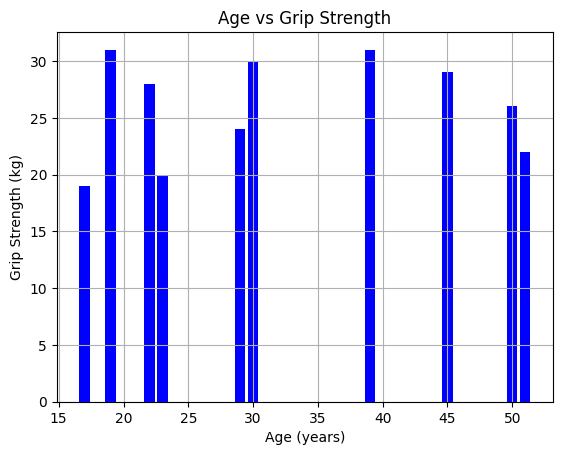

In [8]:
import matplotlib.pyplot as plt
import os

# Scatter plot: Age vs Grip Strength
plt.bar(df['Age'], df['Grip_strength'], color='blue')
plt.title('Age vs Grip Strength')
plt.xlabel('Age (years)')
plt.ylabel('Grip Strength (kg)')
plt.grid(True)


# Save the figure in the Visualizations folder
plt.savefig('Assignment1/Analysis/Visualizations/age_vs_grip_strength.png')
plt.show()


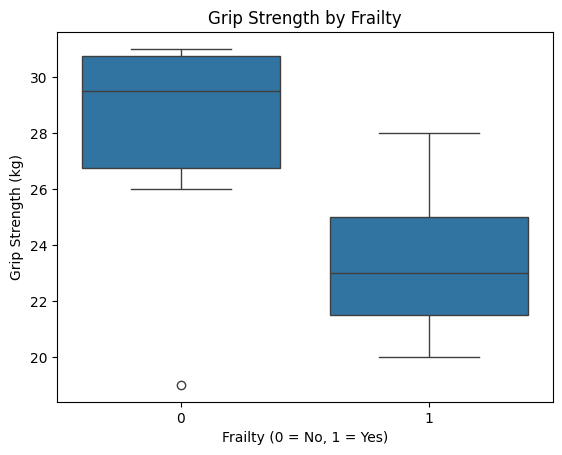

In [9]:
import seaborn as sns

# Box plot to compare Grip Strength by Frailty
sns.boxplot(x='Frailty', y='Grip_strength', data=df)
plt.title('Grip Strength by Frailty')
plt.xlabel('Frailty (0 = No, 1 = Yes)')
plt.ylabel('Grip Strength (kg)')

# Save the visualization
plt.savefig('Assignment1/Analysis/Visualizations/grip_strength_by_frailty.png')
plt.show()


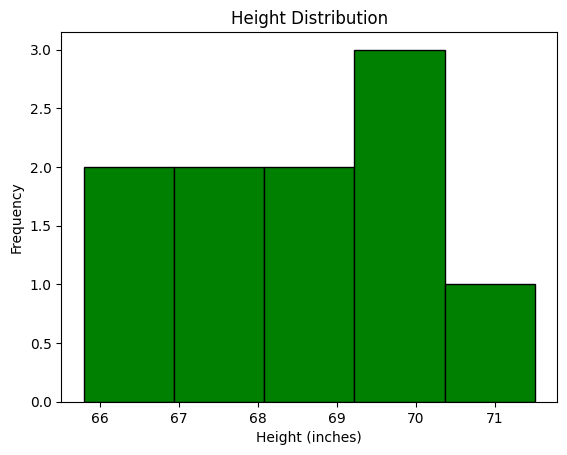

In [10]:
# Histogram for Height Distribution
plt.hist(df['Height'], bins=5, color='green', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')

# Save the visualization
plt.savefig('Assignment1/Analysis/Visualizations/height_distribution.png')
plt.show()


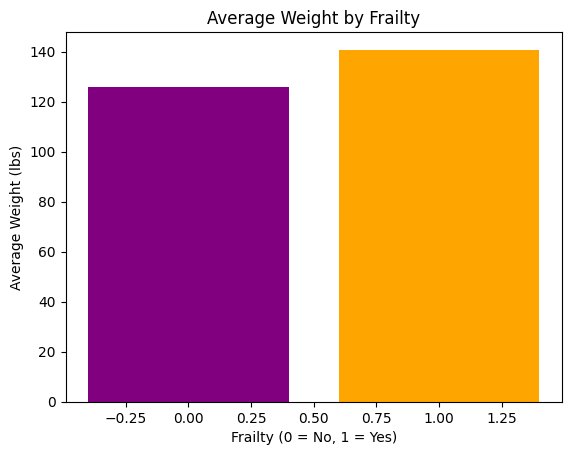

In [11]:
# Bar plot for average weight by frailty
frailty_group = df.groupby('Frailty')['Weight'].mean().reset_index()

plt.bar(frailty_group['Frailty'], frailty_group['Weight'], color=['purple', 'orange'])
plt.title('Average Weight by Frailty')
plt.xlabel('Frailty (0 = No, 1 = Yes)')
plt.ylabel('Average Weight (lbs)')

# Save the visualization
plt.savefig('Assignment1/Analysis/Visualizations/weight_by_frailty.png')
plt.show()


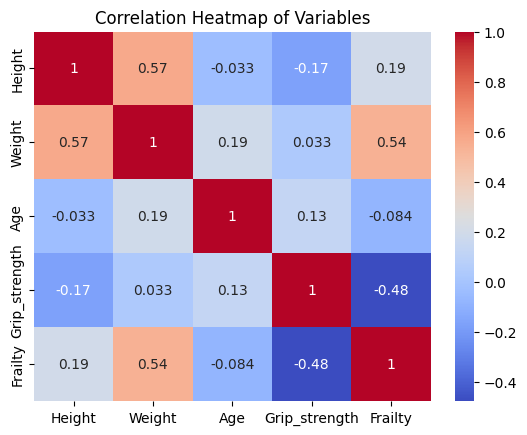

In [12]:
# Correlation matrix heatmap
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Variables')

# Save the visualization
plt.savefig('Assignment1/Analysis/Visualizations/correlation_heatmap.png')
plt.show()


# **Question 2**

**Five Visualizations for the Student Performance Dataset**

In [13]:
#Load the dataset
df_student = pd.read_csv('StudentsPerformance.csv')
df_student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### **Gender Distribution (Bar Plot)**

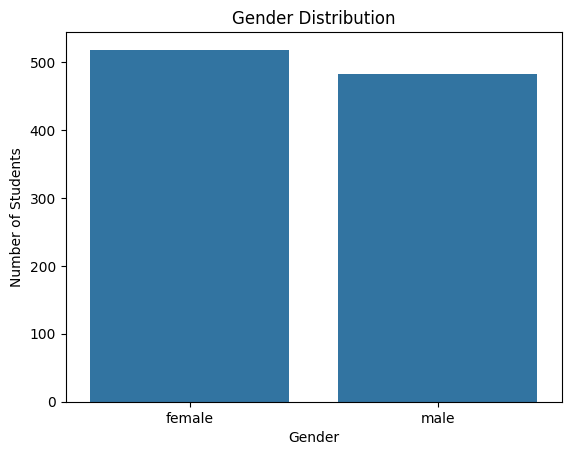

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot to visualize the distribution of gender
sns.countplot(x='gender', data=df_student)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

### **Race/Ethnicity Distribution (Bar Plot)**

<ipython-input-15-c4208719a872>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='race/ethnicity', data=df_student, palette='coolwarm')


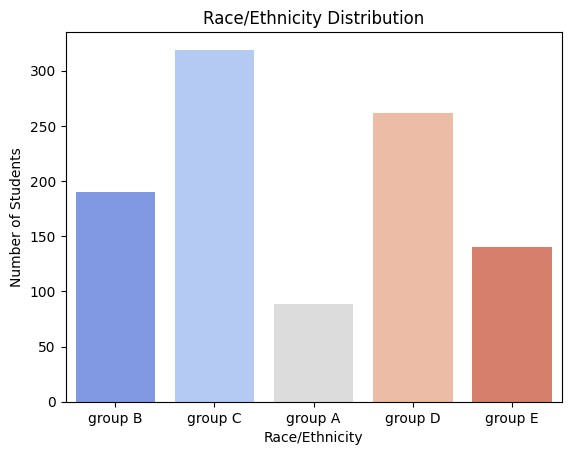

In [15]:
# Bar plot for race/ethnicity distribution
sns.countplot(x='race/ethnicity', data=df_student, palette='coolwarm')
plt.title('Race/Ethnicity Distribution')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Number of Students')
plt.show()

In [16]:
import os

# Create the directory
os.makedirs('Assignment1/StudentPerformance/Analysis/Visualizations/Race', exist_ok=True)

# Now you can save the figure


### **Test Preparation vs Performance (Box Plot)**

<ipython-input-17-54a43249fcfd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test preparation course', y='average_score', data=df_student, palette='Set3')


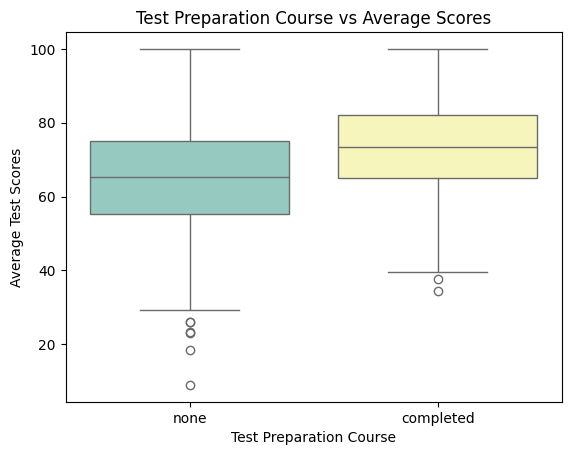

In [17]:
# Create a new column 'average_score' as the mean of math, reading, and writing scores
df_student['average_score'] = df_student[['math score', 'reading score', 'writing score']].mean(axis=1)

# Box plot for test preparation course vs average score
sns.boxplot(x='test preparation course', y='average_score', data=df_student, palette='Set3')
plt.title('Test Preparation Course vs Average Scores')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Test Scores')
plt.show()


### **Parental Education vs Average Scores (Box Plot)**


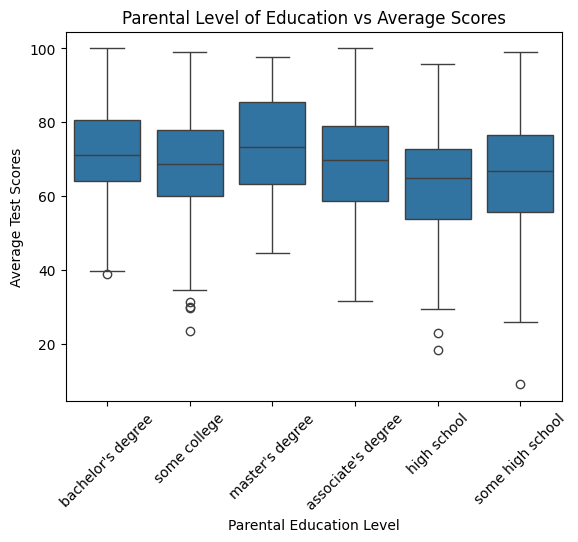

In [18]:
# Box plot for parental education vs average score
sns.boxplot(x='parental level of education', y='average_score', data=df_student)
plt.title('Parental Level of Education vs Average Scores')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Test Scores')
plt.xticks(rotation=45)
plt.show()

### **Race vs Average Scores (Box Plot)**

<ipython-input-19-5912c69d0500>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race/ethnicity', y='average_score', data=df_student, palette='Set1')


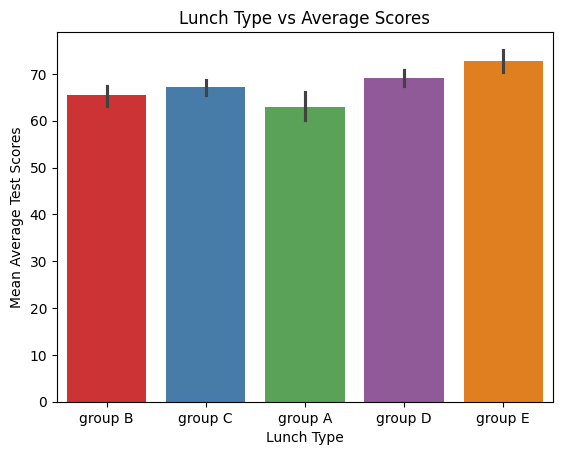

In [19]:
# Bar plot for Race vs average score
lunch_means = df_student.groupby('race/ethnicity')['average_score'].mean().reset_index()

sns.barplot(x='race/ethnicity', y='average_score', data=df_student, palette='Set1')
plt.title('Lunch Type vs Average Scores')
plt.xlabel('Lunch Type')
plt.ylabel('Mean Average Test Scores')
plt.show()